In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

In [109]:
electricity_df = pd.read_csv(r"C:\Users\anjo2\Desktop\Project-1\Resources\ElectricityOilCoalGas.csv")
electricity_df.head()

,series_id,country_code,country_name,year,value
0,EG.ELC.FOSL.ZS,USA,United States,2015,67.078701
1,EG.ELC.FOSL.ZS,USA,United States,2014,67.461953
2,EG.ELC.FOSL.ZS,USA,United States,2013,67.824648
3,EG.ELC.FOSL.ZS,USA,United States,2012,68.862840
4,EG.ELC.FOSL.ZS,USA,United States,2011,68.417858


In [111]:
gdp_df = pd.read_csv(r"C:\Users\anjo2\Desktop\Project-1\Resources\cleaned_df.csv")
gdp_df.head()

,country_code,year,Current US Dollars
0,USA,2014,1.760000e+13
1,USA,2013,1.690000e+13
2,USA,2012,1.630000e+13
3,USA,2011,1.560000e+13
4,USA,2010,1.500000e+13


In [113]:
electricity_df=electricity_df.drop(columns=['series_id'])

In [115]:
electricity_df.head()

,country_code,country_name,year,value
0,USA,United States,2015,67.078701
1,USA,United States,2014,67.461953
2,USA,United States,2013,67.824648
3,USA,United States,2012,68.862840
4,USA,United States,2011,68.417858


In [117]:
merged_df = electricity_df.merge(gdp_df, on=['country_code', 'year'], how='inner')

In [119]:
merged_df.head()

,country_code,country_name,year,value,Current US Dollars
0,USA,United States,2014,67.461953,1.760000e+13
1,USA,United States,2013,67.824648,1.690000e+13
2,USA,United States,2012,68.862840,1.630000e+13
3,USA,United States,2011,68.417858,1.560000e+13
4,USA,United States,2010,70.277765,1.500000e+13


In [121]:
merged_df = merged_df.rename(columns={'value' : '% Electricity (Oil, Gas and Coal)'})

In [123]:
merged_df.head()

,country_code,country_name,year,"% Electricity (Oil, Gas and Coal)",Current US Dollars
0,USA,United States,2014,67.461953,1.760000e+13
1,USA,United States,2013,67.824648,1.690000e+13
2,USA,United States,2012,68.862840,1.630000e+13
3,USA,United States,2011,68.417858,1.560000e+13
4,USA,United States,2010,70.277765,1.500000e+13


In [125]:
merged_df

,country_code,country_name,year,"% Electricity (Oil, Gas and Coal)",Current US Dollars
0,USA,United States,2014,67.461953,1.760000e+13
1,USA,United States,2013,67.824648,1.690000e+13
2,USA,United States,2012,68.862840,1.630000e+13
3,USA,United States,2011,68.417858,1.560000e+13
4,USA,United States,2010,70.277765,1.500000e+13
...,...,...,...,...,...
245,CAN,Canada,1994,20.066478,5.800000e+11
246,CAN,Canada,1993,20.614075,5.790000e+11
247,CAN,Canada,1992,22.823524,5.940000e+11
248,CAN,Canada,1991,21.878177,6.130000e+11


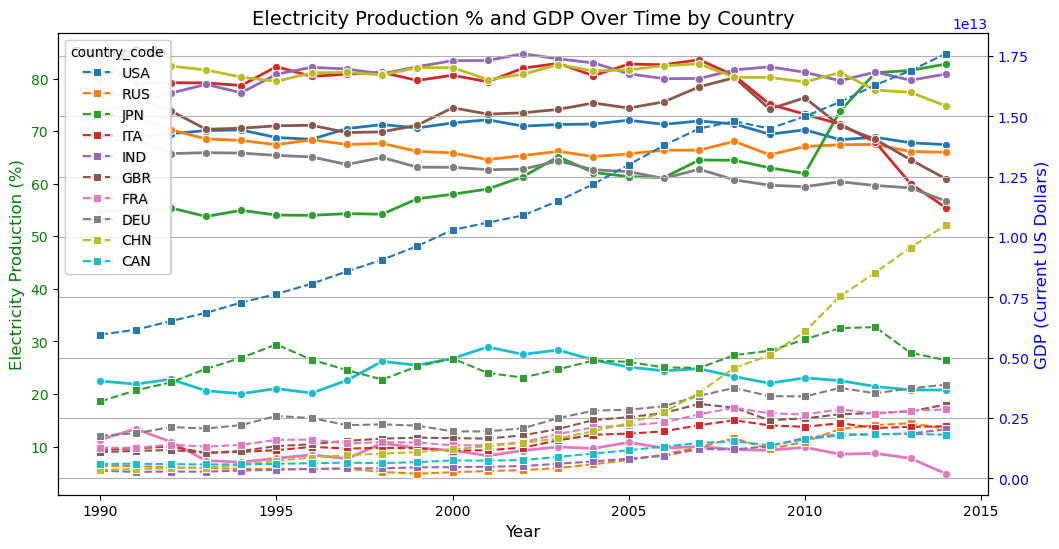

In [127]:
fig, ax1 = plt.subplots(figsize=(12,6))

# First Y-Axis (% Electricity Oil, Gas and Coal)
sns.lineplot(data=merged_df, x='year', y='% Electricity (Oil, Gas and Coal)', hue='country_code', marker='o', linewidth=2, ax=ax1)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Electricity Production (%)", fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title("Electricity Production % and GDP Over Time by Country", fontsize=14)
ax1.legend(title="Country Code", loc="upper left")

# Second Y-Axis (Current US Dollars)
ax2 = ax1.twinx()
sns.lineplot(data=merged_df, x='year', y='Current US Dollars', hue='country_code', marker='s', linestyle='dashed', ax=ax2)
ax2.set_ylabel("GDP (Current US Dollars)", fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Show the Plot
plt.grid(True)
plt.show()

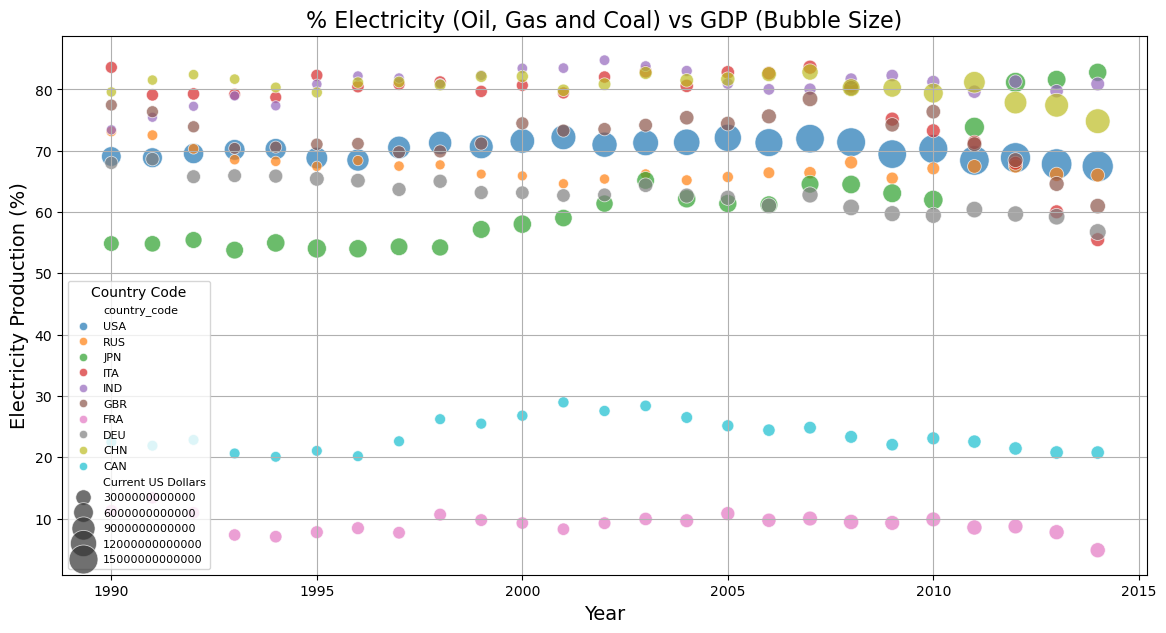

In [128]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=merged_df, x='year', y='% Electricity (Oil, Gas and Coal)', size='Current US Dollars', hue='country_code', sizes=(50, 500), alpha=0.7)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Production (%)", fontsize=14)
plt.title("% Electricity (Oil, Gas and Coal) vs GDP (Bubble Size)", fontsize=16)
plt.legend(title="Country Code", fontsize=8)
plt.grid(True)
plt.show()

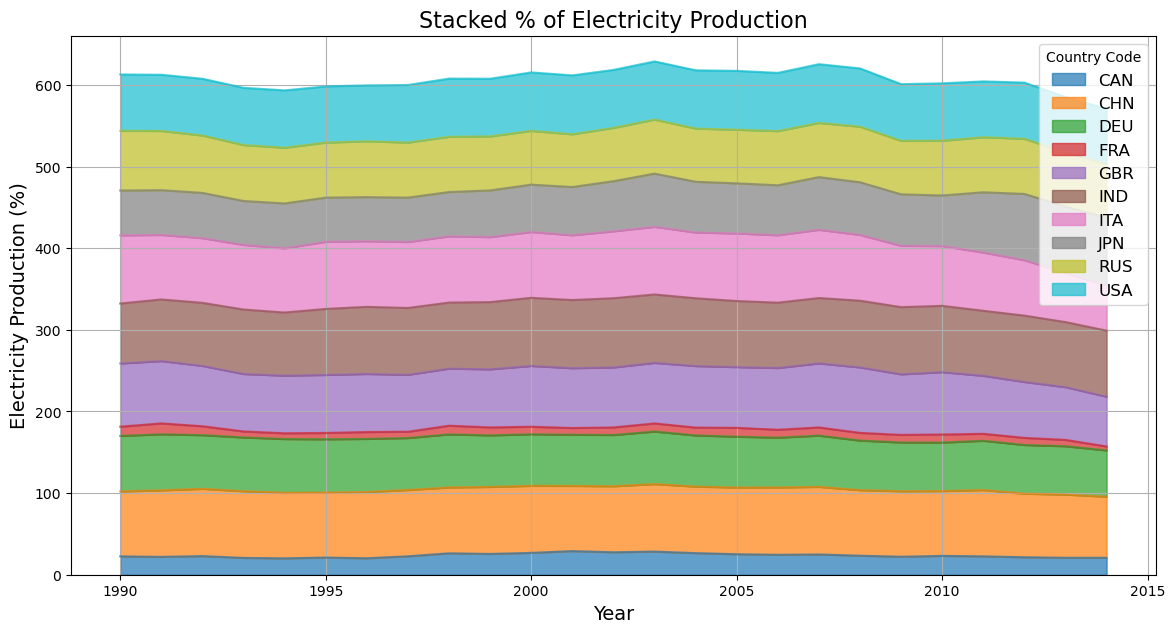

In [130]:
df_pivot = merged_df.pivot(index='year', columns='country_code', values='% Electricity (Oil, Gas and Coal)')

# Plot
df_pivot.plot(kind='area', stacked=True, figsize=(14, 7), alpha=0.7)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Production (%)", fontsize=14)
plt.title("Stacked % of Electricity Production", fontsize=16)
plt.legend(title="Country Code", fontsize=12)
plt.grid(True)
plt.show()

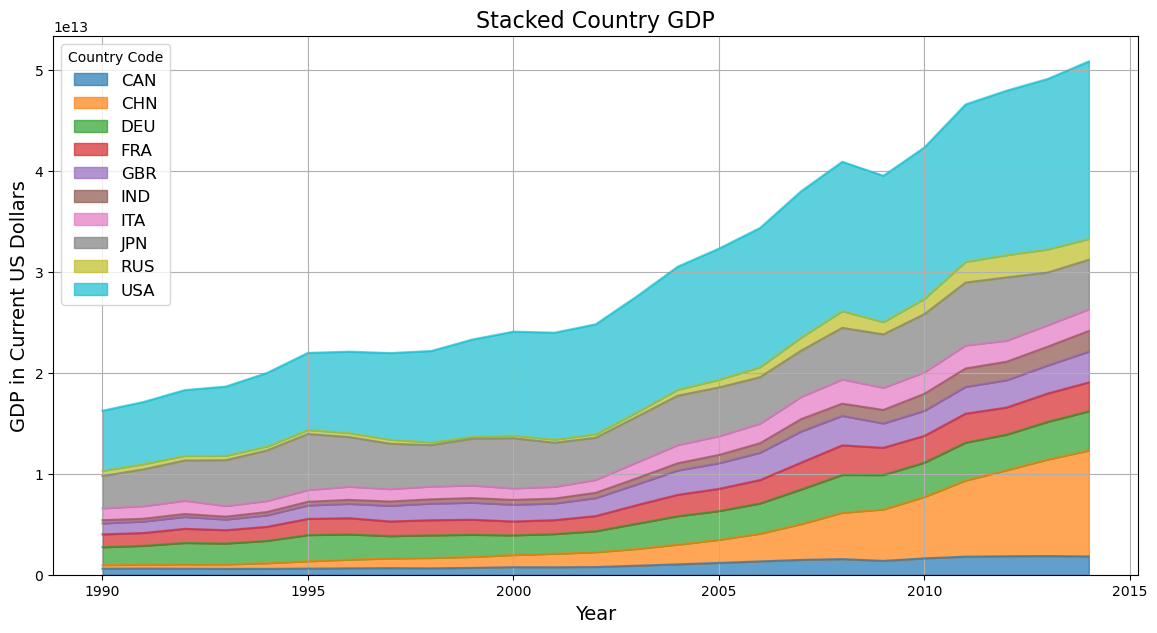

In [99]:
df_pivot = merged_df.pivot(index='year', columns='country_code', values='Current US Dollars')

# Plot
df_pivot.plot(kind='area', stacked=True, figsize=(14, 7), alpha=0.7)

plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP in Current US Dollars", fontsize=14)
plt.title("Stacked Country GDP", fontsize=16)
plt.legend(title="Country Code", fontsize=12)
plt.grid(True)
plt.show()